## **Importing Libraries**

In [1]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import pandas as pd
import nltk
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn import metrics
from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## **Reading 20 Newsgroups Dataset**

In [3]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [4]:
df = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [5]:
df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

# **EDA**

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

This function help to extract various text features. It identifies and counts different types of text elements, including words, hashtags, numbers,symbols, acronyms, emails, URLs, dates, and quoted text.

In [9]:
def extract_text_features(df, column_name="data"):
    words, hashtags, digits, symbols, uppercase_words, emails, urls, dates, quotes = [], [], [], [], [], [], [], [], []
    for doc in df[column_name]:
        words.extend(re.findall(r'\b[a-zA-Z]+\b', doc))
        hashtags.extend(re.findall(r'#\w+', doc))
        digits.extend(re.findall(r'\b\d+\b', doc))
        symbols.extend(re.findall(r'[^\w\s]', doc))
        uppercase_words.extend(re.findall(r'\b[A-Z]{2,}\b', doc))
        emails.extend(re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', doc))
        urls.extend(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', doc))
        dates.extend(re.findall(r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b|\b\d{4}\b', doc))
        quotes.extend(re.findall(r'"([^"]*)"', doc))

    stop_words_found = [word for word in words if word.lower() in stop_words]

    counts = {
        "Words": len(words),
        "Hashtags": len(hashtags),
        "Digits": len(digits),
        "Stopwords": len(stop_words_found),
        "Symbols": len(symbols),
        "Acronyms": len(uppercase_words),
        "Emails": len(emails),
        "URLs": len(urls),
        "Dates": len(dates),
        "Quoted Text": len(quotes)
    }
    for category, count in counts.items():
        print(f"{category}: {count}")

    return counts


In [10]:
features=extract_text_features(df)

Words: 516729
Hashtags: 227
Digits: 19646
Stopwords: 227591
Symbols: 174871
Acronyms: 17717
Emails: 1167
URLs: 1
Dates: 3101
Quoted Text: 3730


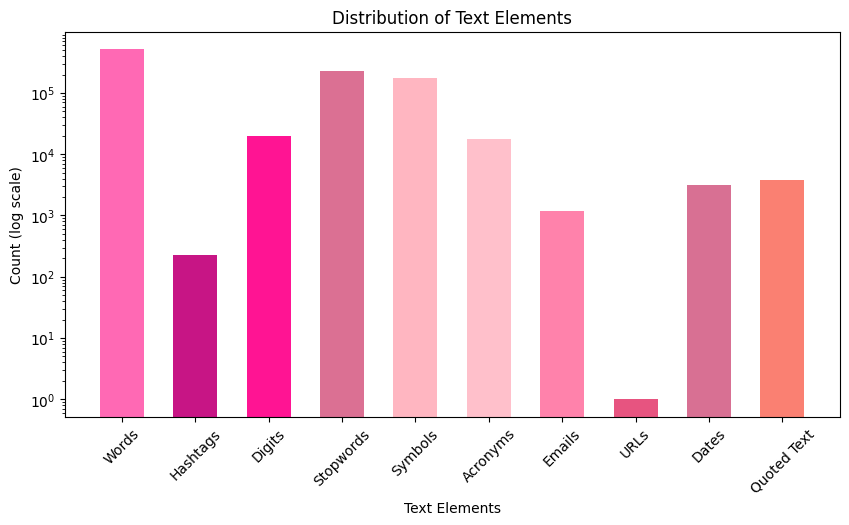

In [11]:
#plot text elements
categories = list(features.keys())
values = list(features.values())
values = [v if v > 0 else 1 for v in values]
colors = ["#FF69B4", "#C71585", "#FF1493", "#DB7093", "#FFB6C1", "#FFC0CB", "#FF82AB", "#E75480", "#D87093", "#FA8072"]

plt.figure(figsize=(10, 5))
plt.bar(categories, values, color=colors, width=0.6)
plt.yscale('log')
plt.xlabel("Text Elements")
plt.ylabel("Count (log scale)")
plt.title("Distribution of Text Elements")
plt.xticks(rotation=45)
plt.show()

## **The insights from above chart is:**

* Words are the most common in the text.

* Digits and symbols appear a lot.

* Stopwords are very frequent.

* Hashtags, URLs, and emails are rare.

* Dates and quoted text show up often.

* Acronyms are not used much.

# preprocessing

The text_preprocessing function cleans text by converting it to lowercase, removing URLs, email addresses, hashtags, digits, and punctuation, and then applies tokenization, stopword removal, and lemmatization before returning the processed text.

In [16]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet') # Download the wordnet resource

def text_preprocessing(text):
    text=text.lower()
    text=re.sub(r'http\S+|www\S+', '', text)
    text=re.sub(r'\S+@\S+', '', text)
    text=re.sub(r'#\w+', '', text)
    text=re.sub(r'\d+', '', text)
    text=text.translate(str.maketrans('', '', string.punctuation))
    text=re.sub(r'^>.*$', '', text, flags=re.MULTILINE)
    words=word_tokenize(text)
    words=[word for word in words if word not in stop_words]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
df_preprocessed= [text_preprocessing(text) for text in df.data]

In [18]:
print(df_preprocessed[-1])

yes take money profitable commercial enterprise give government redistribute government much efficient trustworthy noble selfserving business let nip redistributionist ignorance bud commercial enterprise whole world would starving


# Word Frequency Analysis

In [19]:
all_words=' '.join(df_preprocessed).split()

In [20]:
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
for c in common_words:
    print(f"{c[0]}: {c[1]}")

image: 1774
would: 1508
one: 1396
space: 1230
file: 1093
also: 1088
like: 931
system: 925
program: 887
get: 834
dont: 828
know: 823
time: 793
people: 756
use: 726
data: 715
god: 710
may: 700
see: 684
jpeg: 673


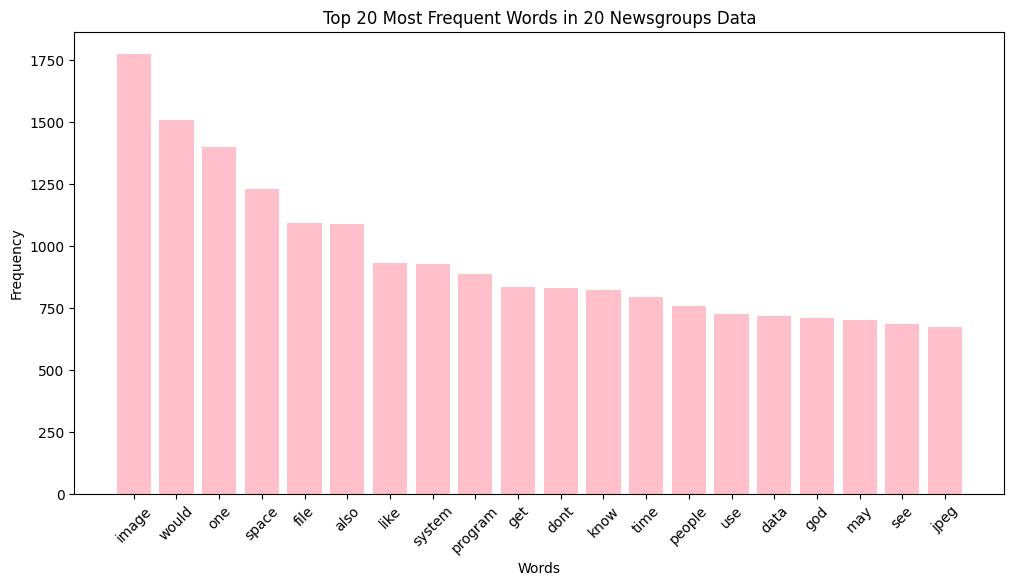

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(*zip(*common_words), color='pink')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in 20 Newsgroups Data")
plt.show()

## **The insights from above chart is:**
* **"image"** is the most common word.

* Words like **"would," "one," "space," and "file"** are also frequent.

* Technical terms such as **"system," "program," and "data"** appear often.

* Everyday words like **"like," "know," "time," and "people"** are also common.

* **"jpeg"** suggests that the text may include discussions related to images or file formats.


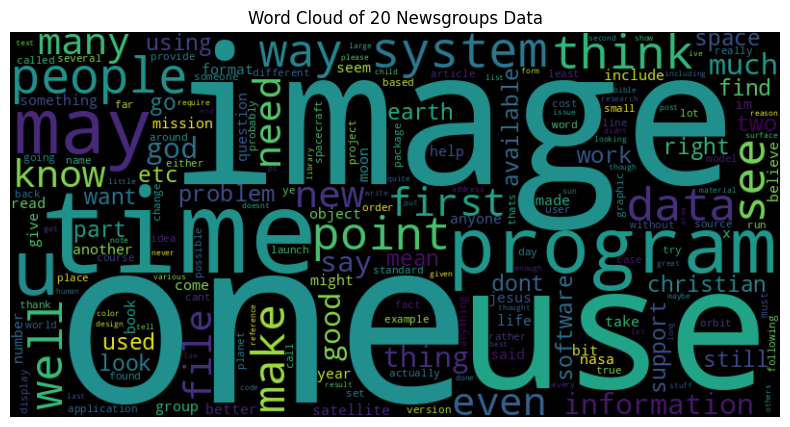

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df_preprocessed))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of 20 Newsgroups Data")
plt.show()


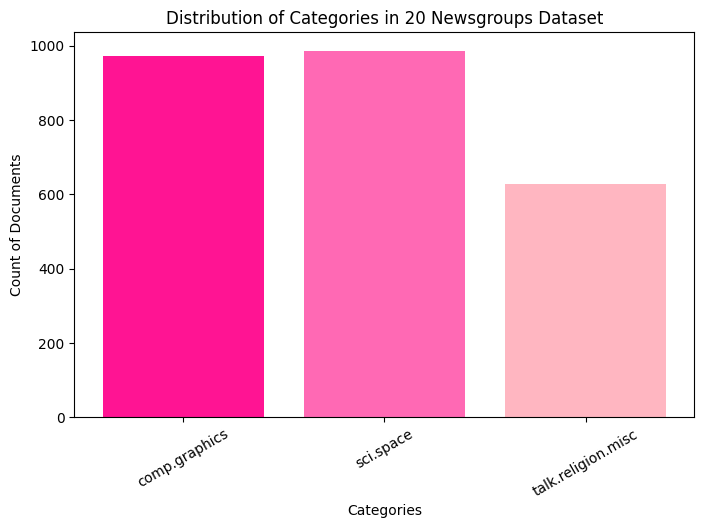

In [23]:
category_names = [df.target_names[i] for i in df.target]
plt.figure(figsize=(8, 5))
unique_categories, counts = np.unique(df.target, return_counts=True)
plt.bar([df.target_names[i] for i in unique_categories], counts, color=['#FF1493','#FF69B4', '#FFB6C1'])

plt.xlabel("Categories")
plt.ylabel("Count of Documents")
plt.title("Distribution of Categories in 20 Newsgroups Dataset")
plt.xticks(rotation=30)
plt.show()


## **The insights from above chart is:**
* The number of documents varies across categories **"Imbalance data"**.

* **comp.graphics**and sci.space have the highest document counts.

* **talk.religion.misc** has significantly fewer documents.

* The imbalance **may affect** model performance.


In [24]:
df_preprocessed = pd.DataFrame(df_preprocessed)
print(df_preprocessed.head())


                                                   0
0  think largely result effort people reading gro...
1  regard fractal commpression seen fractal compr...
2  background orion spacedrive theoretical concep...
3  thou wilt shall whole law honestly word sin re...
4                                                   


In [25]:
df_preprocessed.columns=['text']
df_preprocessed.head()

,text
0,think largely result effort people reading gro...
1,regard fractal commpression seen fractal compr...
2,background orion spacedrive theoretical concep...
3,thou wilt shall whole law honestly word sin re...
4,


In [26]:
df_preprocessed = df_preprocessed.drop_duplicates().reset_index(drop=True)

In [27]:
df_preprocessed.duplicated().sum()

0

In [28]:
df_preprocessed.isnull().sum()

,0
text,0


## **Redaing PeopleWiki Datset**

In [29]:
#We will retrieve the Wikipedia Articles Dataset
people_wiki_df = pd.read_csv('/content/people_wiki.csv')
#Lets see what we have in the dataset
people_wiki_df.head(3)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...


In [31]:
print(people_wiki_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59071 entries, 0 to 59070
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URI          59071 non-null  object
 1   name         59071 non-null  object
 2   text         59071 non-null  object
 3   text_length  59071 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB
None


In [32]:
print(people_wiki_df.describe())

        text_length
count  59071.000000
mean    1897.737062
std      832.249150
min     1046.000000
25%     1387.000000
50%     1655.000000
75%     2129.000000
max    31850.000000


In [33]:
print(people_wiki_df.isnull().sum())

URI            0
name           0
text           0
text_length    0
dtype: int64


In [34]:
print(people_wiki_df['text'].head())

0    digby morrell born 10 october 1979 is a former...
1    alfred j lewy aka sandy lewy graduated from un...
2    harpdog brown is a singer and harmonica player...
3    franz rottensteiner born in waidmannsfeld lowe...
4    henry krvits born 30 december 1974 in tallinn ...
Name: text, dtype: object


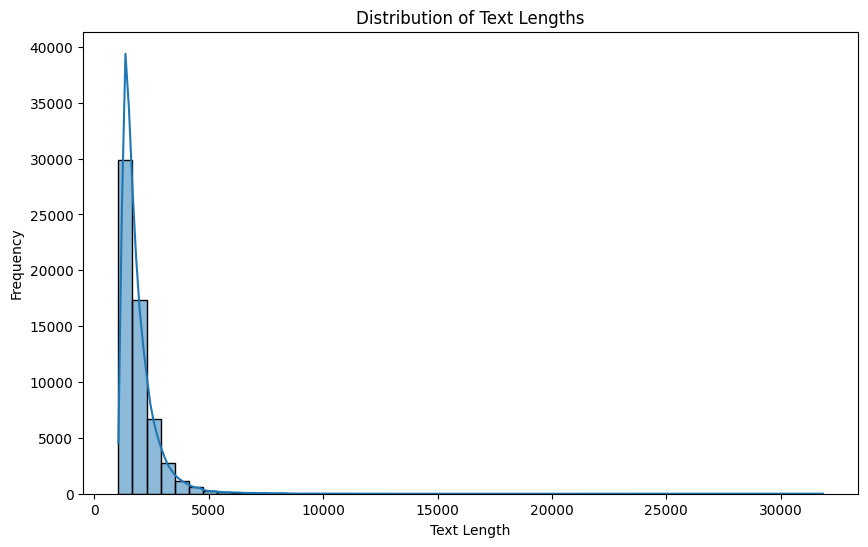

In [35]:
# Analyze text length distribution
people_wiki_df['text_length'] = people_wiki_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(people_wiki_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**top 10 names and their frequencies**

In [36]:
print(people_wiki_df['name'].value_counts().head(10))

name
author)                         2
Digby Morrell                   1
John Farrar                     1
Juliette Commagere              1
Jai Abberton                    1
Adrian Clarke (photographer)    1
Charlie Coffey                  1
Ozires Silva                    1
Peng Xiaofeng                   1
Vincent Brady                   1
Name: count, dtype: int64


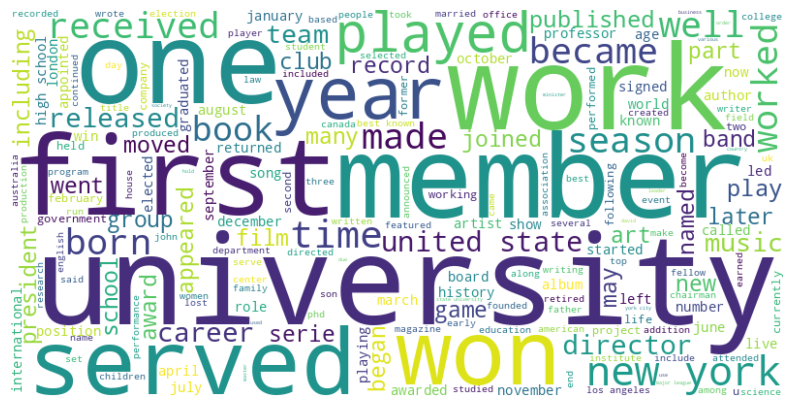

In [37]:
text = ' '.join(people_wiki_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

also: 67773
university: 62456
born: 54997
year: 52312
first: 50338
new: 49617
one: 35764
state: 33104
member: 32644
work: 32198
time: 32002
school: 31339
national: 30126
music: 30008
award: 29964
american: 29409
world: 29184
film: 29049
season: 28194
two: 27565


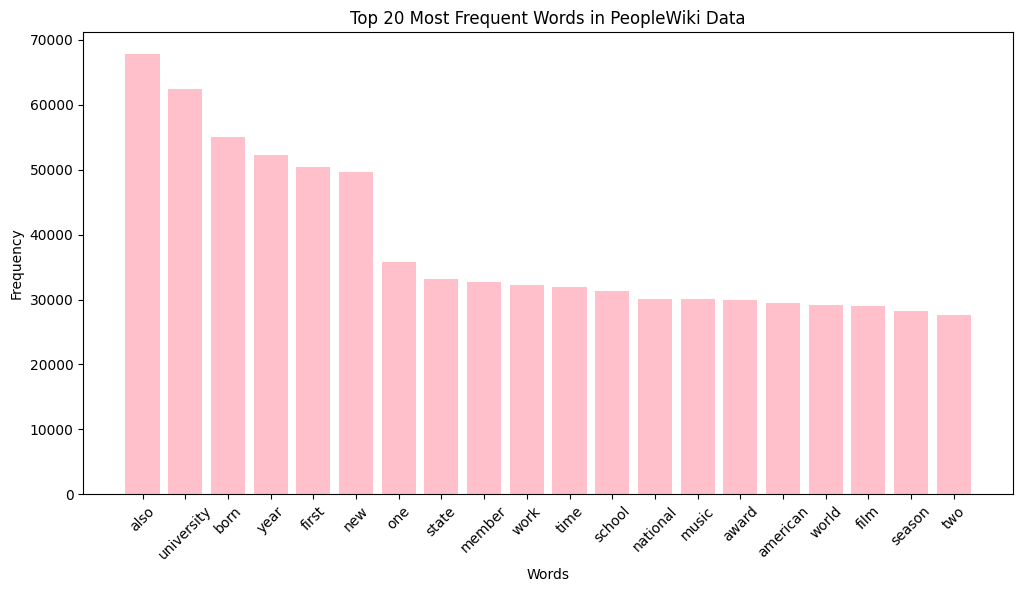

In [40]:
# Preprocess the text data
def text_preprocessing(text):
    text=text.lower()
    text=re.sub(r'http\S+|www\S+', '', text)
    text=re.sub(r'\S+@\S+', '', text)
    text=re.sub(r'#\w+', '', text)
    text=re.sub(r'\d+', '', text)
    text=text.translate(str.maketrans('', '', string.punctuation))
    text=re.sub(r'^>.*$', '', text, flags=re.MULTILINE)
    words=word_tokenize(text)
    words=[word for word in words if word not in stop_words]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)
people_wiki_df['processed_text'] = people_wiki_df['text'].apply(text_preprocessing)

all_words = ' '.join(people_wiki_df['processed_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

for c in common_words:
    print(f"{c[0]}: {c[1]}")

plt.figure(figsize=(12, 6))
plt.bar(*zip(*common_words), color='pink')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in PeopleWiki Data")
plt.show()
